# Name : Riya Singh

# Loan Repayment Case Study

1) Exploratory Data Analysis

2) Training and Testing the Model

3) Question answers

## Exploratory Data Analysis
Outline of Steps to be carried out

1) Importing necessary Libraries

2) Importing the dataset

3) Analyzing the dataset

4) Analyzing the missing values

5) Analyzing the categorical variables

6) Analyzing the numerical variables

7) Dropping the columns which are not required 

8) Imputing (Handling the missing values) / One Hot Encoding

### Importing necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [4]:
plt.rcParams.update({
    'font.size': 10,             # General font size
    'axes.titlesize': 13,        # Title font size
    'axes.labelsize': 13,        # Axis label font size
    'xtick.labelsize': 13,        # X-tick label font size
    'ytick.labelsize': 13,        # Y-tick label font size
    'legend.fontsize': 11        # Legend font size
})

### Importing the dataset

In [5]:
df = pd.read_csv("loan_dataset_final.csv", encoding='latin-1')
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,pub_rec_bankruptcies,interest_rate,revol_utilization,number_bc_gt_75,fico_score,lti,month_since_oldest_tl,race_name,gender
0,1000007,1225615,5150,5150,5150.0,60 months,132.58,atlantic tomorrows office,1 year,RENT,34992.0,Source Verified,Nov-11,Current,n,Borrower added on 10/22/11 > to pay off bills ...,debt_consolidation,bills,NY,17.59,0.0,3.0,NaN,113.0,15.0,1.0,15187,21.0,266.22,266.22,7674.25000,7674.25,4883.78,2790.47,0.0,0.0,0.0,0.0,1.0,0.1864,0.873,2,709,0.147176,124.0,White,Female
1,1000030,1225638,20000,20000,20000.0,36 months,635.07,The Red Threads Inc.,6 years,RENT,72000.0,Verified,Oct-11,Fully Paid,n,NaN,moving,Temp Loan,NY,7.80,0.0,2.0,NaN,NaN,6.0,0.0,15637,14.0,0.00,0.00,22610.98773,22610.99,20000.00,2610.99,0.0,0.0,0.0,0.0,0.0,0.0890,0.354,0,744,0.277778,149.0,African American,Female
2,1000033,1225642,12800,12800,12750.0,60 months,316.54,T-Mobile USA Inc,9 years,MORTGAGE,81708.0,Source Verified,Nov-11,Fully Paid,n,Borrower added on 10/26/11 > I will be prepari...,home_improvement,Home Improvement,TX,14.22,1.0,1.0,15.0,NaN,7.0,0.0,905,23.0,0.00,0.00,14401.17047,14344.92,12800.00,1601.17,0.0,0.0,0.0,0.0,0.0,0.1677,0.754,0,719,0.156655,176.0,White,Female


In [6]:
df2 = df.copy()

### Analyzing the dataset

In [7]:
df.shape

(42535, 47)

In [8]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,pub_rec_bankruptcies,interest_rate,revol_utilization,number_bc_gt_75,fico_score,lti,month_since_oldest_tl
count,4.253500e+04,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42506.000000,15609.000000,3651.000000,42506.000000,42506.000000,4.253500e+04,42506.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42390.0,41170.000000,42535.000000,42445.000000,42535.000000,42535.000000,42531.000000,42506.000000
mean,6.645799e+05,8.257026e+05,11089.722581,10821.585753,10139.830603,322.623063,6.913656e+04,13.373043,0.152449,1.306357,35.017618,49.313339,9.343951,0.058156,1.429786e+04,22.124406,11.849562,11.815891,12005.641023,11298.592611,9664.271346,2239.547094,1.515321,100.307353,13.956737,0.0,0.045227,0.121650,0.442584,0.499988,723.065240,0.186105,107.567073
std,2.193022e+05,2.795409e+05,7410.938391,7146.914675,7131.686447,208.927216,6.409635e+04,6.726315,0.512406,1.711415,22.418427,41.594235,4.496274,0.245713,2.201844e+04,11.592811,125.376563,125.061859,9067.243728,9010.323570,7087.469380,2583.722104,7.827800,718.078716,159.621861,0.0,0.208737,0.037079,0.306107,0.785378,30.241456,0.116228,58.874550
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.054200,0.000000,0.000000,619.000000,0.000789,1.000000
25%,4.983925e+05,6.384795e+05,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,0.000000,17.000000,0.000000,6.000000,0.000000,3.635000e+03,13.000000,0.000000,0.000000,5462.787436,4791.415000,4400.000000,657.100000,0.000000,0.000000,0.000000,0.0,0.000000,0.096300,0.166000,0.000000,704.000000,0.097674,67.000000
50%,6.442500e+05,8.241780e+05,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,1.000000,33.000000,55.000000,9.000000,0.000000,8.821000e+03,20.000000,0.000000,0.000000,9680.084710,8955.040000,8000.000000,1339.160000,0.000000,0.000000,0.000000,0.0,0.000000,0.119900,0.446000,0.000000,719.000000,0.162813,98.000000
75%,8.258225e+05,1.033946e+06,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,2.000000,51.000000,88.000000,12.000000,0.000000,1.725100e+04,29.000000,0.000000,0.000000,16421.755100,15525.180000,13425.000000,2802.950000,0.000000,0.000000,0.000000,0.0,0.000000,0.147200,0.701000,1.000000,739.000000,0.250000,134.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,33.000000,120.000000,119.000000,47.000000,5.000000,1.207359e+06,90.000000,3555.850000,3553.300000,58563.679930,58563.680000,35000.020000,23823.750000,209.000000,29623.350000,7002.190000,0.0,2.000000,0.245900,1.088000,3.000000,829.000000,1.337500,685.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42535 non-null  int64  
 1   member_id                   42535 non-null  int64  
 2   loan_amnt                   42535 non-null  int64  
 3   funded_amnt                 42535 non-null  int64  
 4   funded_amnt_inv             42535 non-null  float64
 5   term                        42535 non-null  object 
 6   installment                 42535 non-null  float64
 7   emp_title                   39909 non-null  object 
 8   emp_length                  41423 non-null  object 
 9   home_ownership              42535 non-null  object 
 10  annual_inc                  42531 non-null  float64
 11  verification_status         42535 non-null  object 
 12  issue_d                     42535 non-null  object 
 13  loan_status                 425

In [10]:
# Dropping ID field as they are not required in the analysis
df = df.drop('id', axis=1)
df = df.drop('member_id', axis=1)
df.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,pub_rec_bankruptcies,interest_rate,revol_utilization,number_bc_gt_75,fico_score,lti,month_since_oldest_tl,race_name,gender
0,5150,5150,5150.0,60 months,132.58,atlantic tomorrows office,1 year,RENT,34992.0,Source Verified,Nov-11,Current,n,Borrower added on 10/22/11 > to pay off bills ...,debt_consolidation,bills,NY,17.59,0.0,3.0,NaN,113.0,15.0,1.0,15187,21.0,266.22,266.22,7674.25000,7674.25,4883.78,2790.47,0.0,0.0,0.0,0.0,1.0,0.1864,0.873,2,709,0.147176,124.0,White,Female
1,20000,20000,20000.0,36 months,635.07,The Red Threads Inc.,6 years,RENT,72000.0,Verified,Oct-11,Fully Paid,n,NaN,moving,Temp Loan,NY,7.80,0.0,2.0,NaN,NaN,6.0,0.0,15637,14.0,0.00,0.00,22610.98773,22610.99,20000.00,2610.99,0.0,0.0,0.0,0.0,0.0,0.0890,0.354,0,744,0.277778,149.0,African American,Female
2,12800,12800,12750.0,60 months,316.54,T-Mobile USA Inc,9 years,MORTGAGE,81708.0,Source Verified,Nov-11,Fully Paid,n,Borrower added on 10/26/11 > I will be prepari...,home_improvement,Home Improvement,TX,14.22,1.0,1.0,15.0,NaN,7.0,0.0,905,23.0,0.00,0.00,14401.17047,14344.92,12800.00,1601.17,0.0,0.0,0.0,0.0,0.0,0.1677,0.754,0,719,0.156655,176.0,White,Female


In [18]:
#As months are in object type right now, we onvert them into int data type
df['term'] = df['term'].str.replace(' months', '').astype(int)

### Analyzing the missing values

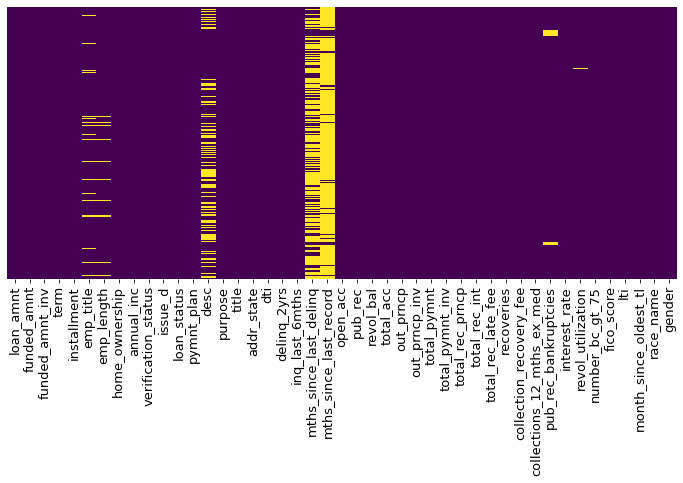

In [19]:
plt.figure(figsize=(12, 5))  # Adjust width and height as needed
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

plt.show()

In [20]:
df.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
installment                       0
emp_title                      2626
emp_length                     1112
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
desc                          13519
purpose                           0
title                            13
addr_state                        0
dti                               0
delinq_2yrs                      29
inq_last_6mths                   29
mths_since_last_delinq        26926
mths_since_last_record        38884
open_acc                         29
pub_rec                          29
revol_bal                         0
total_acc                        29
out_prncp                         0
out_prncp_inv               

Analysis -> Some fields have NaN values. In this

Fields like desc, mths_since_last_delinq, mths_since_last_record have many fields as NaN values. So we will drop them later

We will find a metric to fill the remaining NaN values later

### Analyzing the categorical variables

In [21]:
#making a list of features having categorical values
categorical_features = [features for features in df.columns if df[features].dtypes=='O']

In [22]:
for features in categorical_features:
    print('The feature is {} and number of categories are {}'.format(features,len(df[features].unique())))

The feature is emp_title and number of categories are 30447
The feature is emp_length and number of categories are 12
The feature is home_ownership and number of categories are 5
The feature is verification_status and number of categories are 3
The feature is issue_d and number of categories are 55
The feature is loan_status and number of categories are 9
The feature is pymnt_plan and number of categories are 2
The feature is desc and number of categories are 28949
The feature is purpose and number of categories are 14
The feature is title and number of categories are 20964
The feature is addr_state and number of categories are 50
The feature is race_name and number of categories are 4
The feature is gender and number of categories are 2


In [23]:
#As 'loan status' is our outcome variable, we see what different types of values it can have and how they are distributed in the dataframe

distinct_types_counts = df['loan_status'].value_counts()

# Print the distinct types and their counts
for loan_status, count in distinct_types_counts.items():
    print(f'{loan_status}: {count}')

Fully Paid: 33586
Charged Off: 5653
Does not meet the credit policy. Status:Fully Paid: 1988
Does not meet the credit policy. Status:Charged Off: 761
Current: 513
In Grace Period: 16
Late (31-120 days): 12
Late (16-30 days): 5
Default: 1


In [24]:
#As some categorical features have many different categories present in them (e.g. emp_title, desc, title), it's tough to analyze them.
#So we only analyze those features having less than 50 categories
categorical_features_to_analyze = [features for features in categorical_features if len(df[features].unique())<=50]
categorical_features_to_analyze

['emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'race_name',
 'gender']

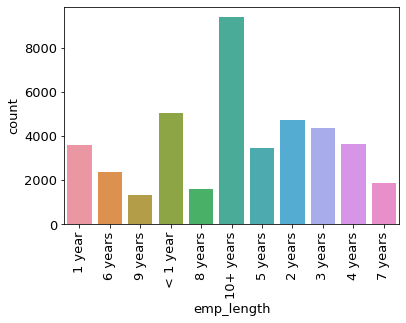

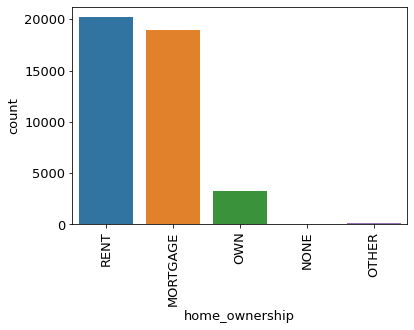

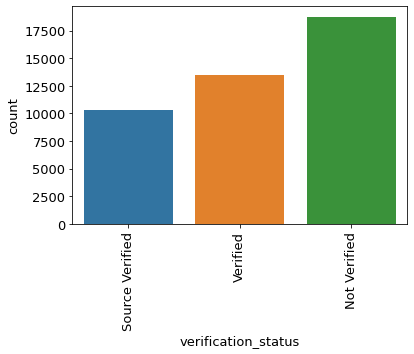

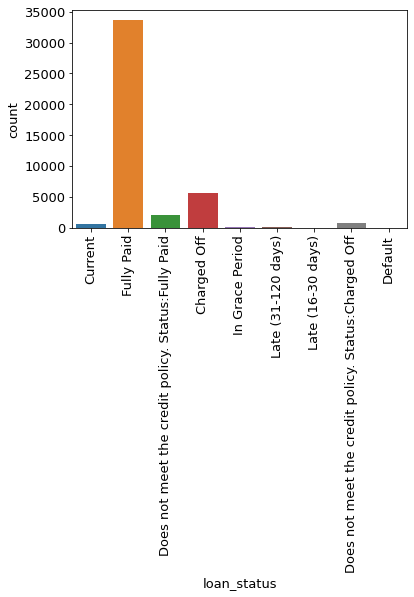

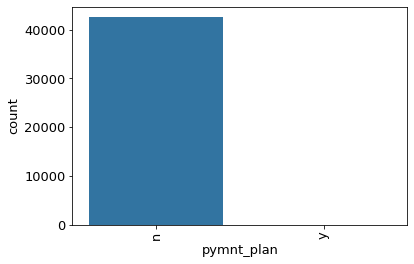

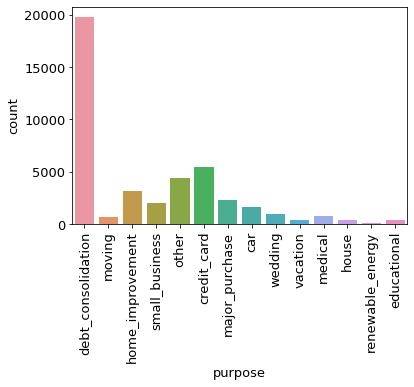

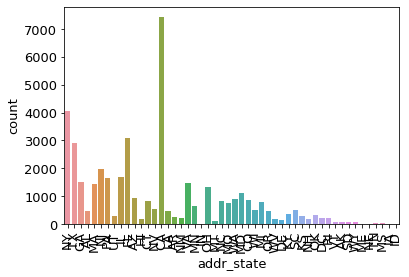

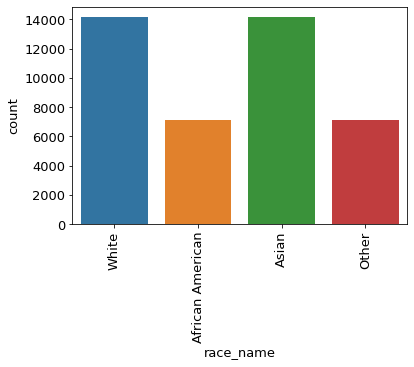

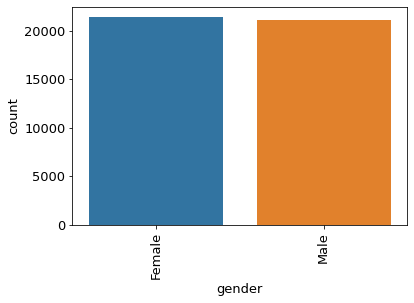

In [25]:
#We draw a countplot to see how is a feature distributed withing it's category
for features in categorical_features_to_analyze:
    plot = sns.countplot(x=features, data=df)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plt.show()

Now we see how different categorical variables are related with the outcome variable 'loan status'

The three most frequently occuring loan_status category is 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Charged Off'.

So we do our analysis with only these three outcomes.

In [29]:
#Analysis with gender
loan_status_filter = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Charged Off']

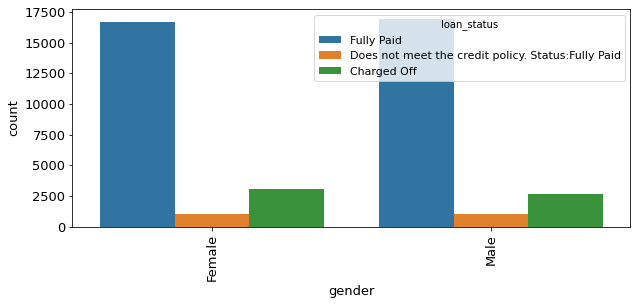

In [30]:
# We first analyze the relation of gender category (It is also important as it can lead to unintentional bias in the dataset)

plt.figure(figsize = (10,4))
plot = sns.countplot(x='gender', hue='loan_status', data=df[df['loan_status'].isin(loan_status_filter)])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

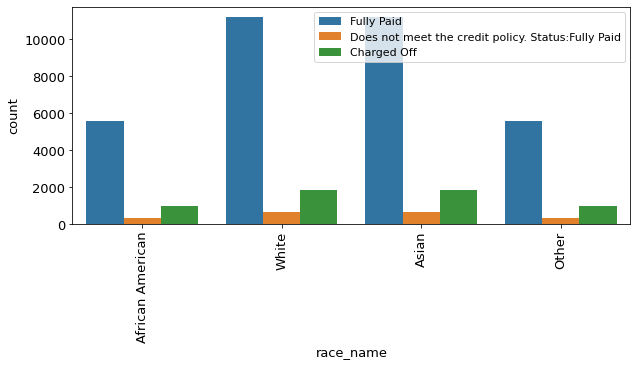

In [31]:
# We analyze the relation of race_name category (It is also important as it can lead to unintentional bias in the dataset)

plt.figure(figsize = (10,4))
plot = sns.countplot(x='race_name', hue='loan_status', data=df[(df['loan_status'].isin(loan_status_filter))])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.legend()
plt.show()

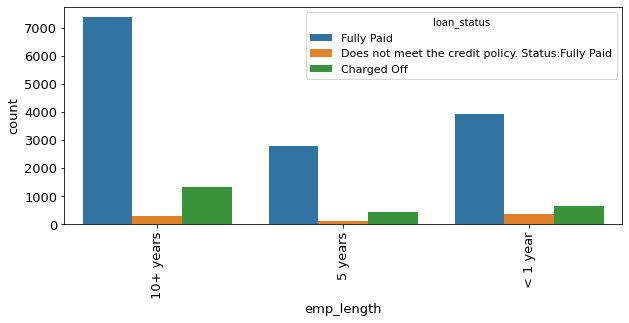

In [32]:
#Analysis with emp_length 
emp_length_filter = ['< 1 year', '5 years', '10+ years'] #We have done our analysis on 3 categories of emp_length

plt.figure(figsize = (10,4))
plot = sns.countplot(x='emp_length', hue='loan_status', data=df[(df['loan_status'].isin(loan_status_filter)) & (df['emp_length'].isin(emp_length_filter))])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

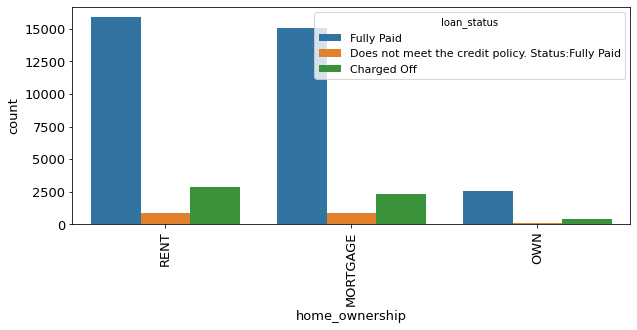

In [33]:
#Analysis with home_ownership
home_ownership_filter = ['RENT', 'MORTGAGE', 'OWN']

plt.figure(figsize = (10,4))
plot = sns.countplot(x='home_ownership', hue='loan_status', data=df[(df['loan_status'].isin(loan_status_filter)) & (df['home_ownership'].isin(home_ownership_filter))])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

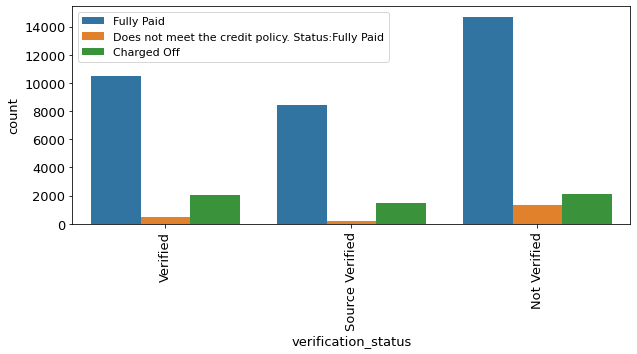

In [34]:
#Analysis with verification_status

plt.figure(figsize = (10,4))
plot = sns.countplot(x='verification_status', hue='loan_status', data=df[(df['loan_status'].isin(loan_status_filter))])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.legend()
plt.show()

### Analyzing the numerical variables

In [35]:
#making a list of features having numerical values
numerical_features = [features for features in df.columns if df[features].dtypes != 'O']

In [36]:
#Seperating continuous and discrete features
discrete_numerical_features = [features for features in numerical_features if (len(df[features].unique()))<25]
continuous_numerical_features = [features for features in numerical_features if (len(df[features].unique()))>25]

In [37]:
for features in discrete_numerical_features:
    print('The feature is {} and number of categories are {}'.format(features,len(df[features].unique())))

The feature is term and number of categories are 2
The feature is delinq_2yrs and number of categories are 13
The feature is pub_rec and number of categories are 7
The feature is collections_12_mths_ex_med and number of categories are 2
The feature is pub_rec_bankruptcies and number of categories are 4
The feature is number_bc_gt_75 and number of categories are 4


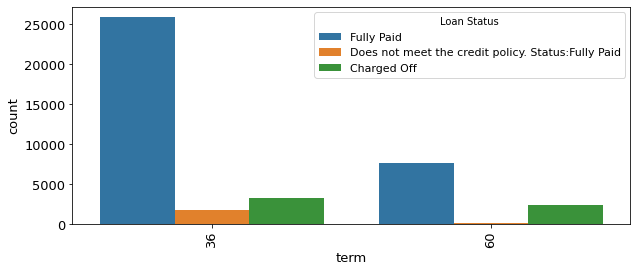

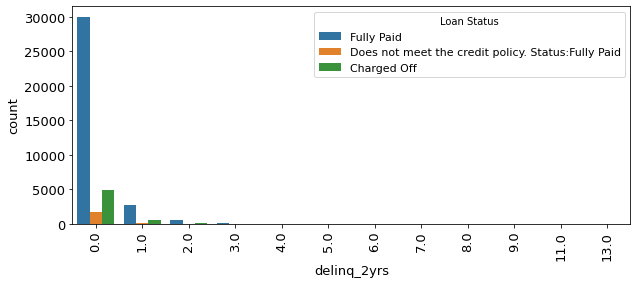

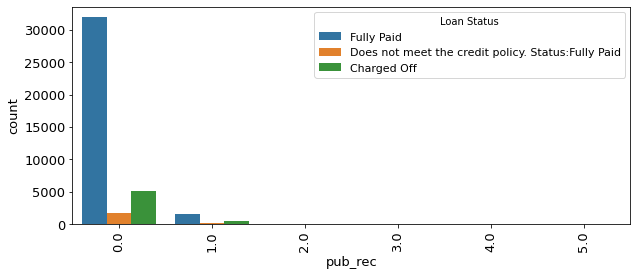

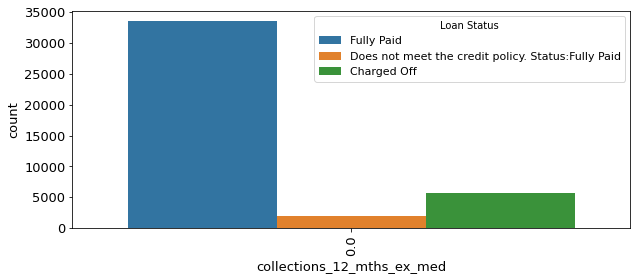

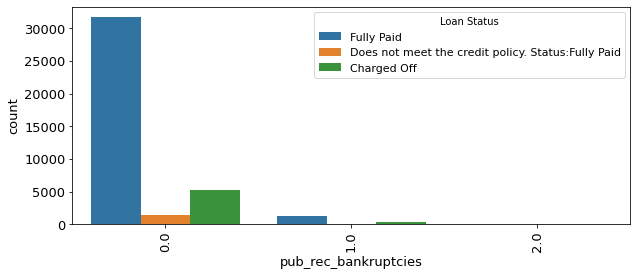

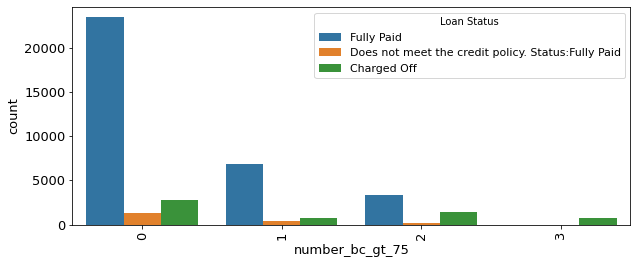

In [38]:
for features in discrete_numerical_features:
    plt.figure(figsize = (10,4))
    plot = sns.countplot(x = features, hue='loan_status',  data=df[(df['loan_status'].isin(loan_status_filter))])
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plt.legend(title='Loan Status', loc='upper right')
    plt.show()

In [42]:
#We do our analysis on continuous numerical features on the following fields.

continuous_numerical_features_to_analyze = ['loan_amnt',
                                            'funded_amnt','funded_amnt_inv',
                                            'installment','dti','open_acc',
                                            'total_acc','interest_rate','annual_inc','total_rec_prncp',
                                            'revol_utilization','fico_score','lti']

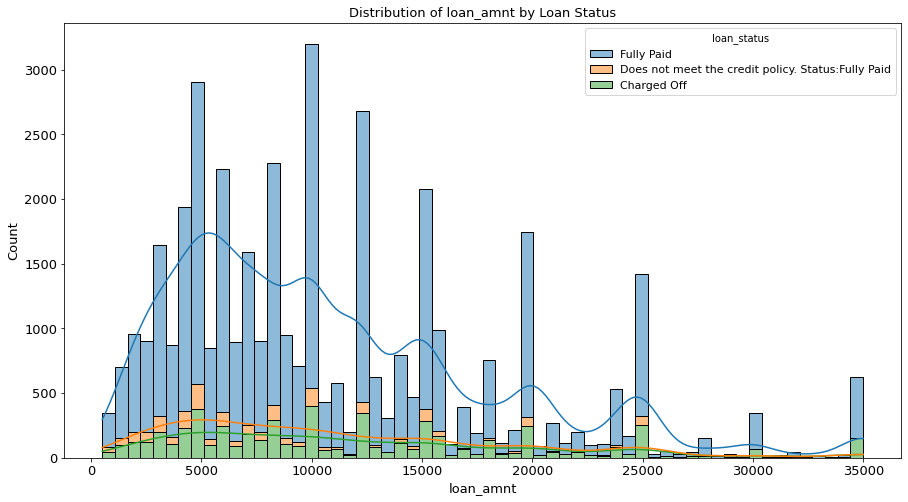

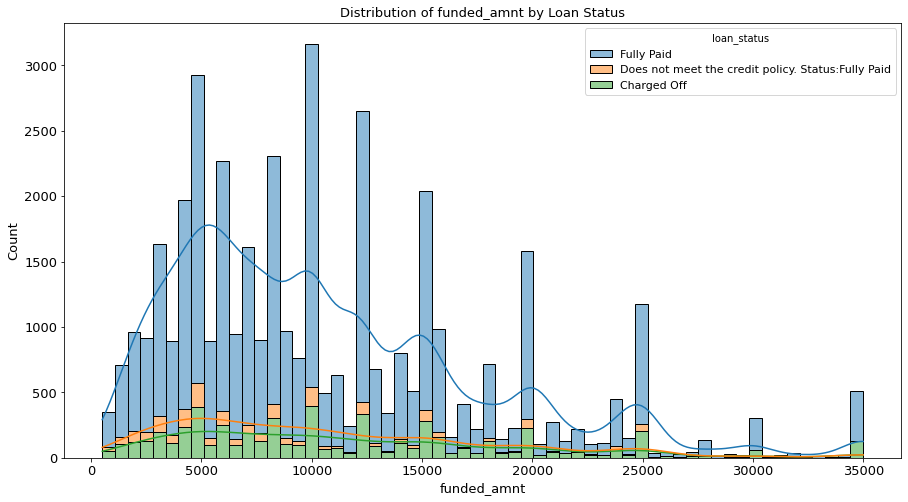

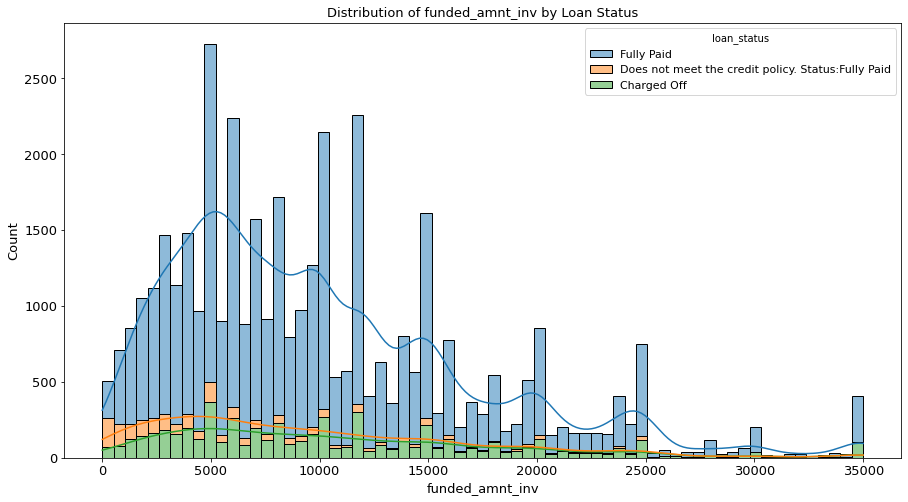

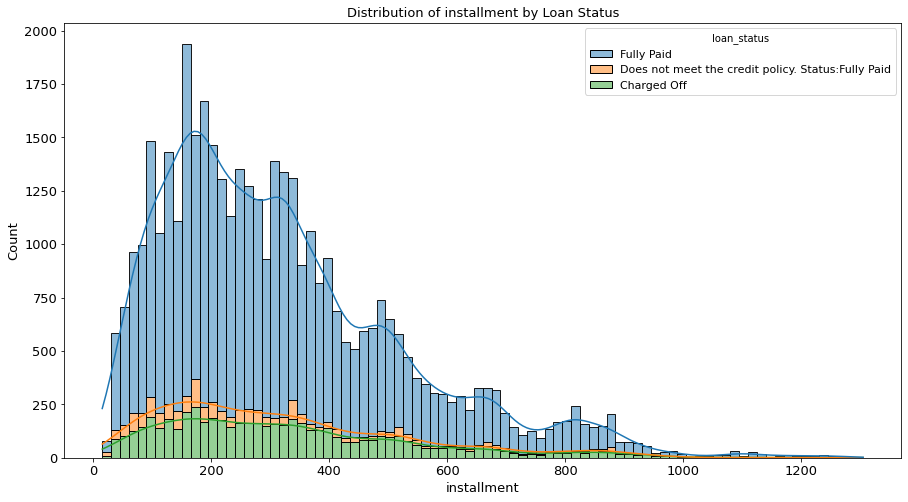

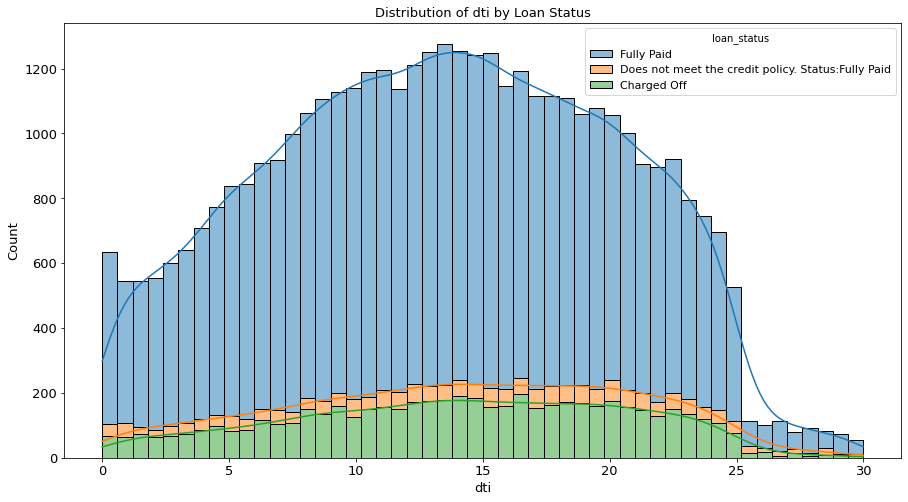

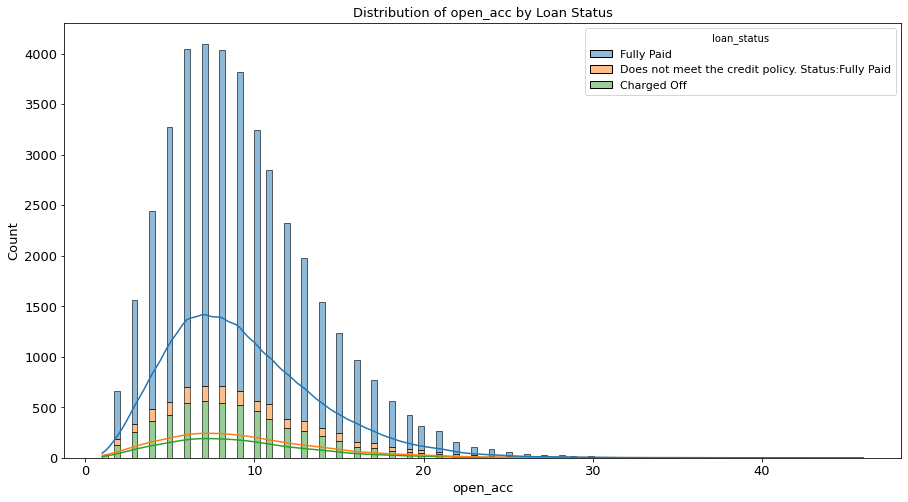

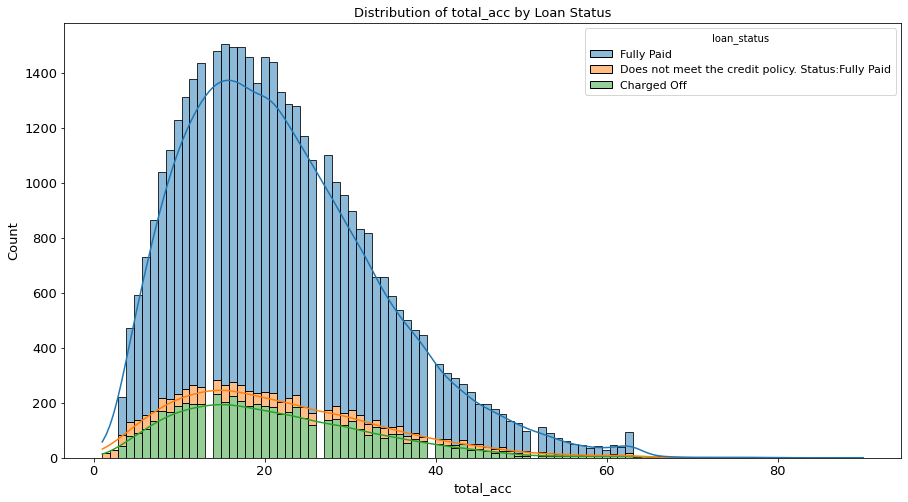

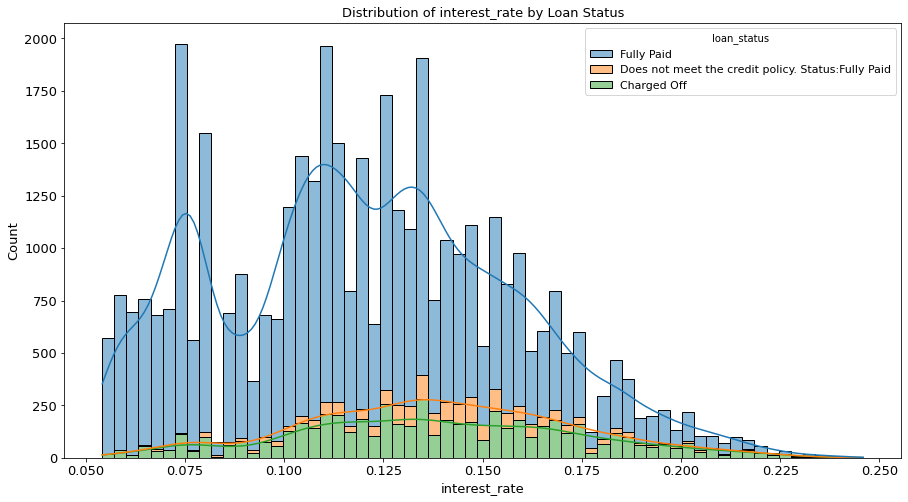

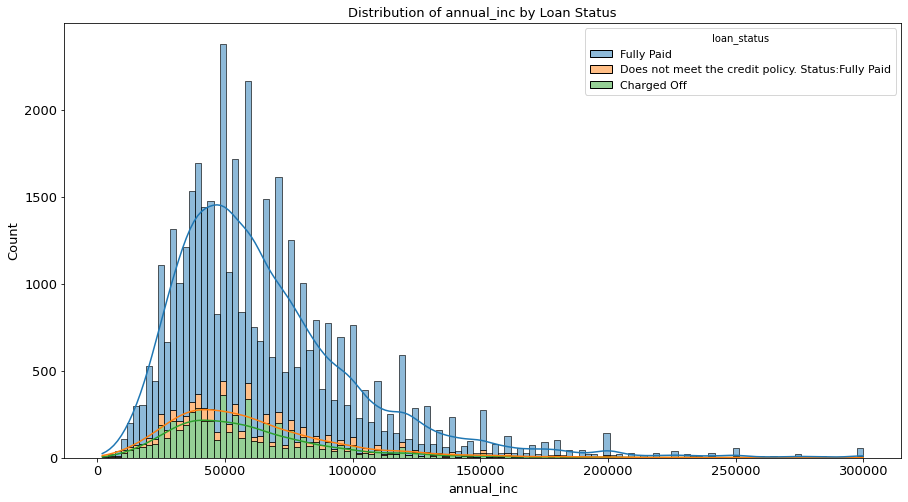

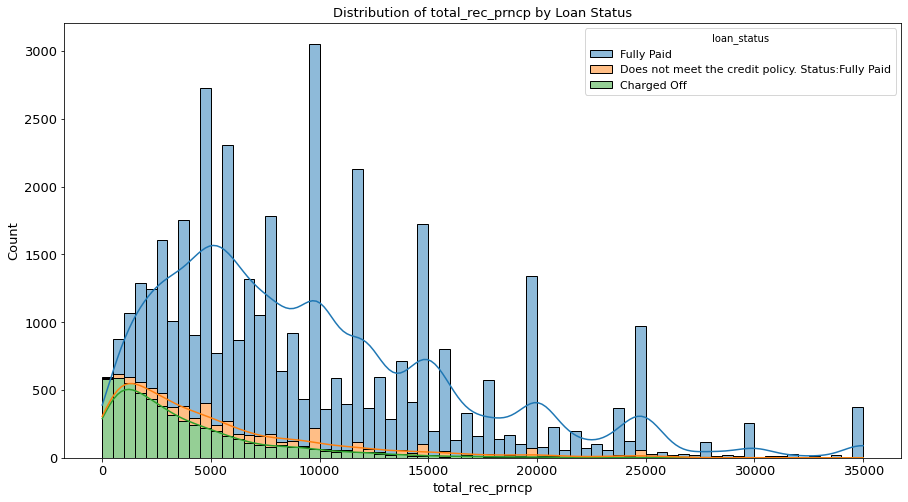

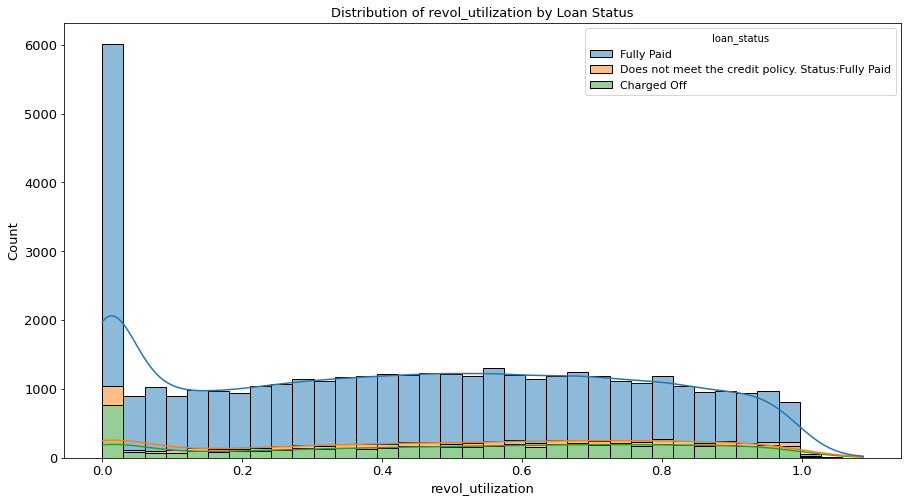

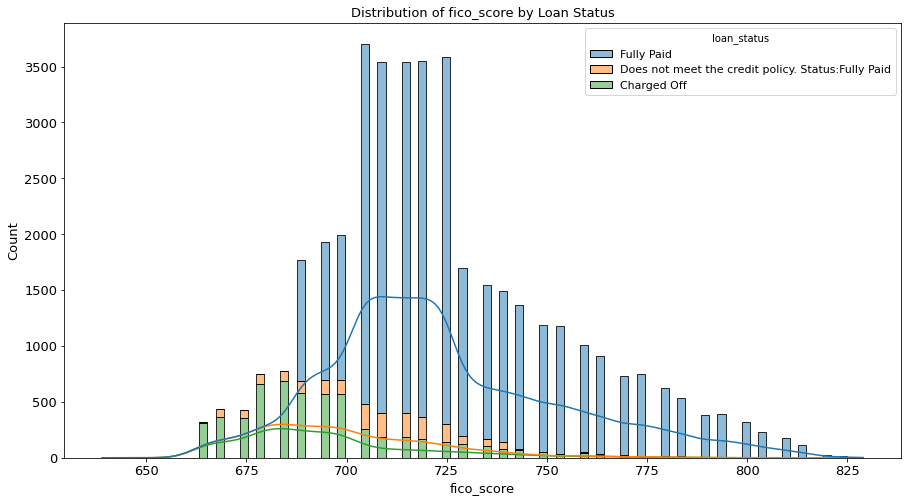

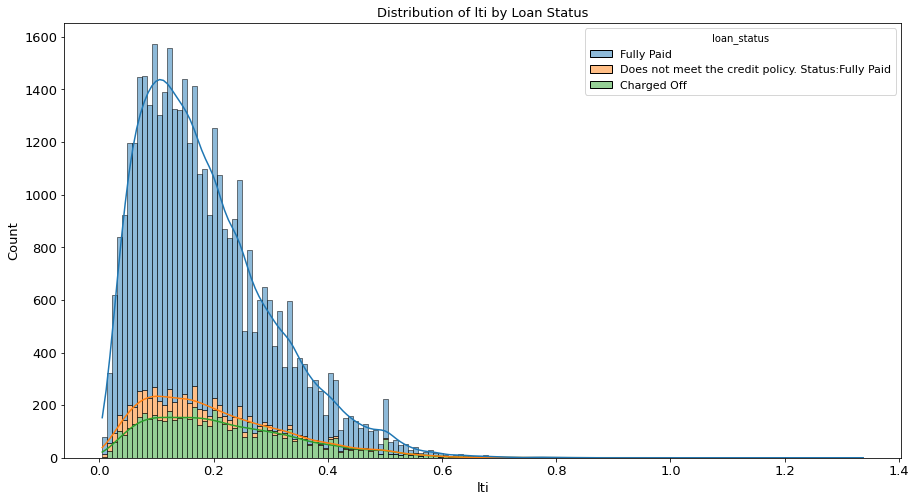

In [43]:
# To prevent outliers we only take those data entries with annual_inc <= 300000
df_filtered = df[df['loan_status'].isin(loan_status_filter) & (df['annual_inc'] <= 300000)] 

# Histograms
for feature in continuous_numerical_features_to_analyze:
    plt.figure(figsize=(15, 8))
    plot = sns.histplot(data=df_filtered, x=feature, hue='loan_status', multiple='stack', kde=True)
#     plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plt.title(f'Distribution of {feature} by Loan Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    handles, labels = plot.get_legend_handles_labels()
    if handles and labels:
        plt.legend(handles=handles, labels=labels, title='Loan Status', loc='upper right')
    plt.show()

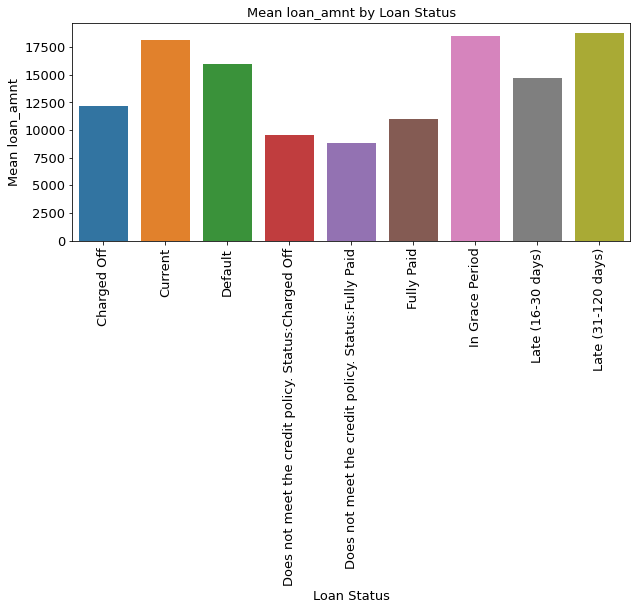

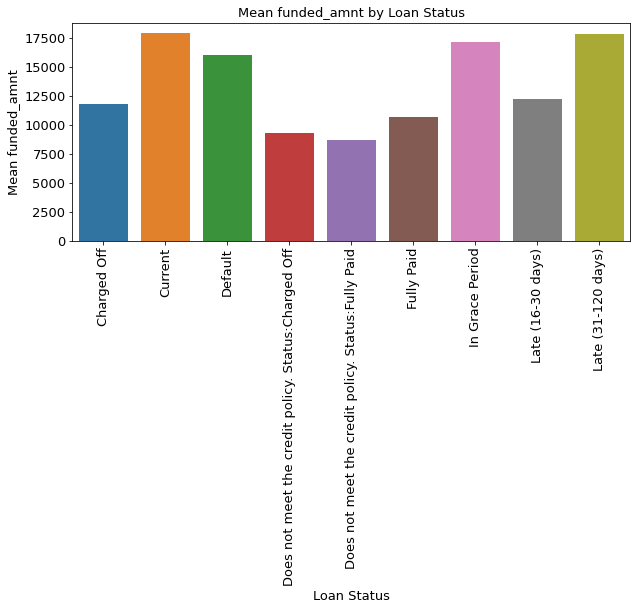

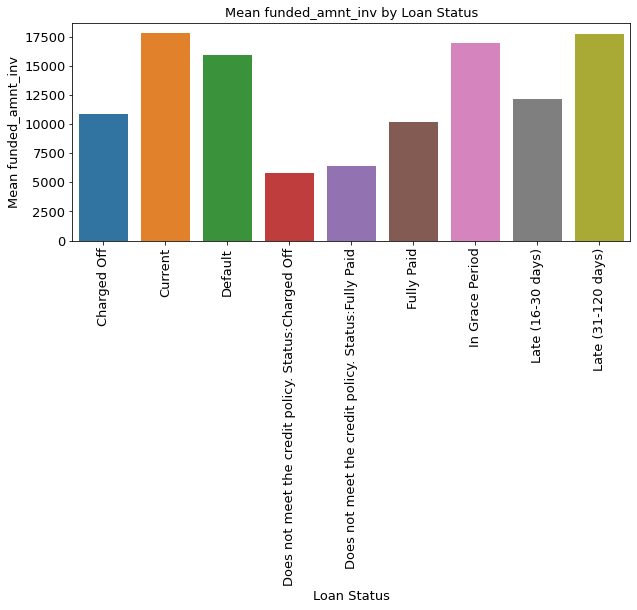

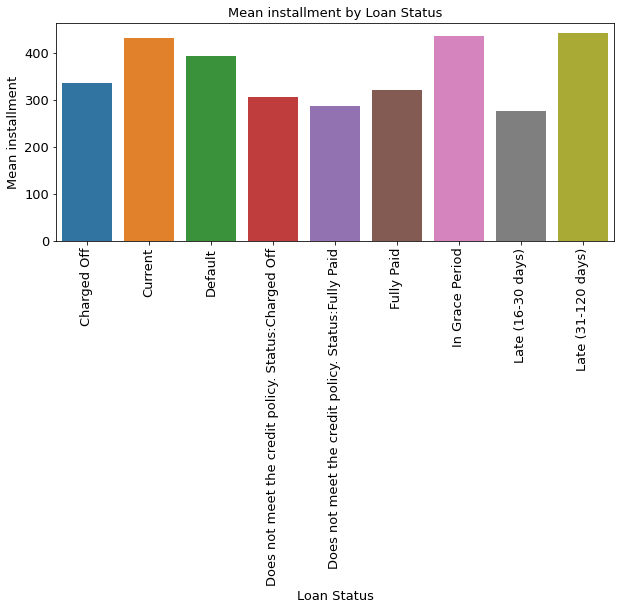

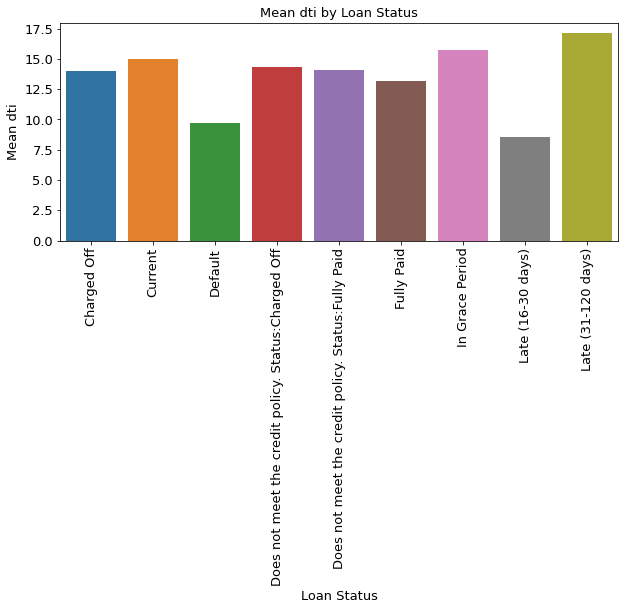

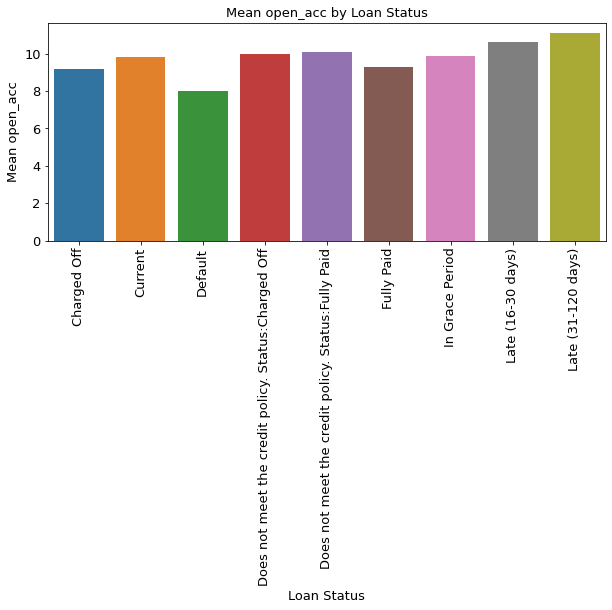

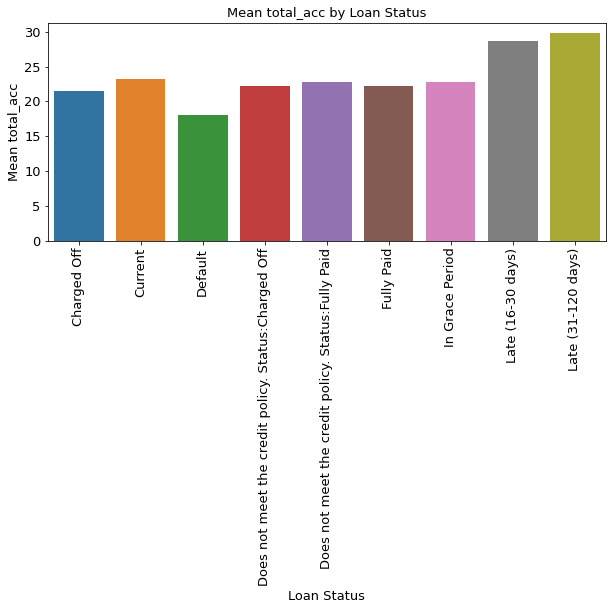

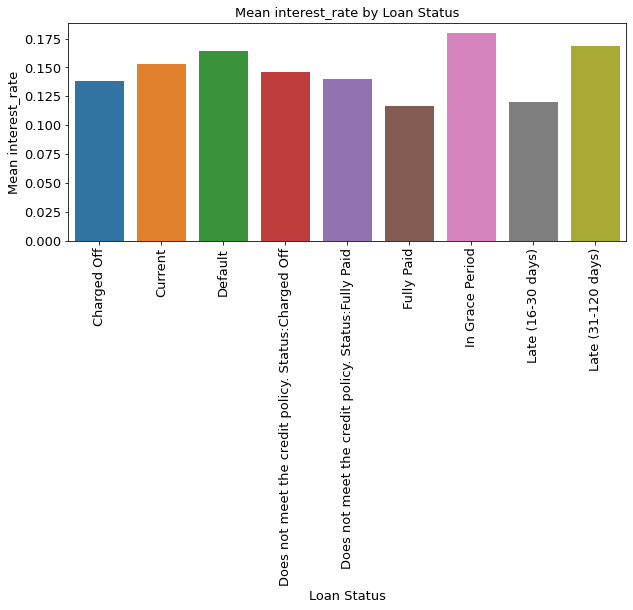

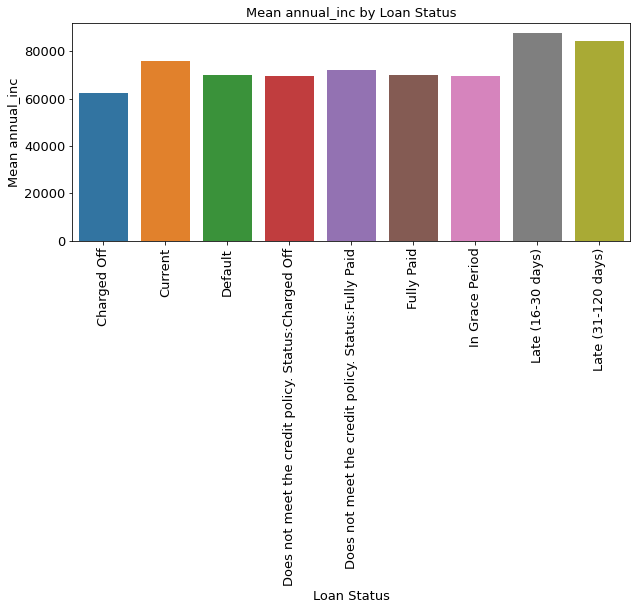

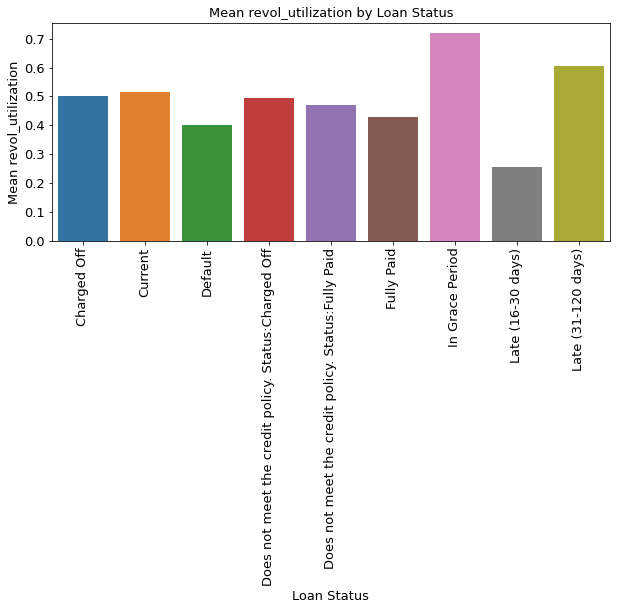

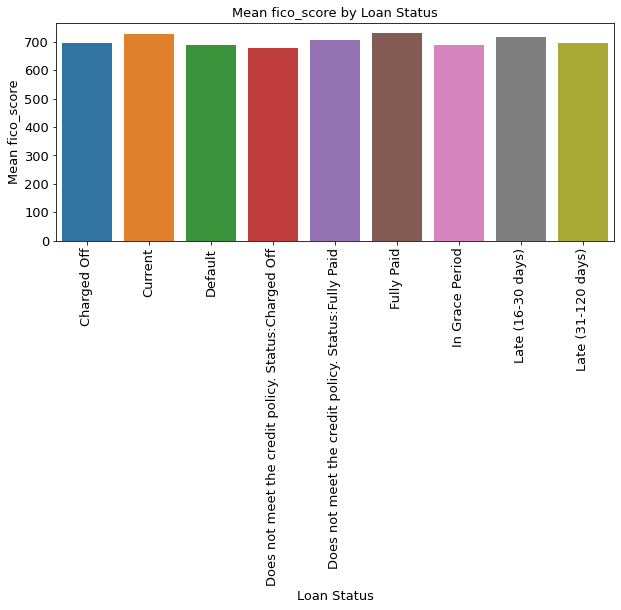

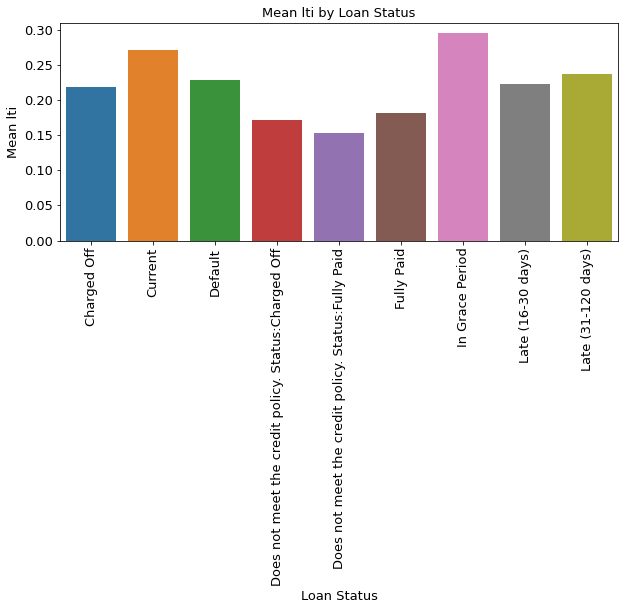

In [41]:
mean_features_by_status = df.groupby('loan_status').mean().reset_index()

for feature in continuous_numerical_features_to_analyze:
    plt.figure(figsize=(10, 4))
    plot = sns.barplot(data=mean_features_by_status, x='loan_status', y=feature)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plt.title(f'Mean {feature} by Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(f'Mean {feature}')
    plt.show()

### Dropping the columns which are not required

In [44]:
#We drop the following fields because they have many NaN values in it.

df = df.drop('desc', axis=1)
df = df.drop('mths_since_last_delinq', axis=1)
df = df.drop('mths_since_last_record', axis=1)

In [45]:
#We drop these fields because we want to avoid any intentional bais based on gender, race, state of living, etc
df = df.drop('race_name', axis=1)
df = df.drop('gender', axis=1)
df = df.drop('addr_state', axis=1)

In [46]:
#We drop these fields as these are more or less in proportion to the field 'loan_amnt'
df = df.drop('funded_amnt', axis=1)
df = df.drop('funded_amnt_inv', axis=1)

In [48]:
#On similar grounds we drop the field 'total_pymnt_inv'
df = df.drop('total_pymnt_inv', axis=1)

In [47]:
#We drop 'pymnt_plan' because most of the values are 'No'
df = df.drop('pymnt_plan', axis=1)

In [49]:
#The following fields are not having any impact on our analysis as they are many categories present in them
df = df.drop('issue_d', axis=1)
df = df.drop('emp_title', axis=1)
df = df.drop('title', axis=1)

In [51]:
#To simplify our analysis, we also drop the fields 'verification_status' and 'purpose'
df = df.drop('verification_status', axis=1)
df = df.drop('purpose', axis=1)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   42535 non-null  int64  
 1   term                        42535 non-null  int32  
 2   installment                 42535 non-null  float64
 3   emp_length                  41423 non-null  object 
 4   home_ownership              42535 non-null  object 
 5   annual_inc                  42531 non-null  float64
 6   loan_status                 42535 non-null  object 
 7   dti                         42535 non-null  float64
 8   delinq_2yrs                 42506 non-null  float64
 9   inq_last_6mths              42506 non-null  float64
 10  open_acc                    42506 non-null  float64
 11  pub_rec                     42506 non-null  float64
 12  revol_bal                   42535 non-null  int64  
 13  total_acc                   425

### Imputing (Handling the missing values) / One Hot Encoding

We want to convert the object data types into numerical type -> (loan_status, emp_length, home_ownership)

In [53]:
#We convert the problem into a binary classification problem.
def loan_status_to_binary(status):
    if status in ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']:
        return 1 
    else:
        return 0  

df['loan_status_binary'] = df['loan_status'].apply(loan_status_to_binary)

In [54]:
df = df.drop('loan_status', axis=1)

In [55]:
df['emp_length'].fillna('< 1 year', inplace=True)  #We first fill the NaN values with '< 1 year'
emp_length_map = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

df['emp_length_int'] = df['emp_length'].map(emp_length_map)
df = df.drop('emp_length', axis=1)

In [56]:
home_ownership_map = {
    'NONE': 0,
    'OTHER': 1,
    'RENT': 2,
    'MORTGAGE': 3,
    'OWN': 4,
}

df['home_ownership_int'] = df['home_ownership'].map(home_ownership_map)
df = df.drop('home_ownership', axis=1)

Now we fill the NaN values in the dataset

In [57]:
# Fields like annual_inc and month_since_oldest_tl can be replaced with mean value
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)
df['month_since_oldest_tl'].fillna(df['month_since_oldest_tl'].mean(), inplace=True)

In [ ]:
#The following fields have integral values, so we replace them with mode
df['delinq_2yrs'].fillna(df['delinq_2yrs'].mode()[0], inplace=True)
df['inq_last_6mths'].fillna(df['inq_last_6mths'].mode()[0], inplace=True)
df['open_acc'].fillna(df['open_acc'].mode()[0], inplace=True)
df['pub_rec'].fillna(df['pub_rec'].mode()[0], inplace=True)
df['total_acc'].fillna(df['total_acc'].mode()[0], inplace=True)

In [58]:
#All the remaining data fields are very close to 0, so we can replace them with 0
df.fillna(0, inplace=True)

In [59]:
df.isnull().sum()

loan_amnt                     0
term                          0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
collections_12_mths_ex_med    0
pub_rec_bankruptcies          0
interest_rate                 0
revol_utilization             0
number_bc_gt_75               0
fico_score                    0
lti                           0
month_since_oldest_tl         0
loan_status_binary            0
emp_length_int                0
home_ownership_int            0
dtype: int64

In [61]:
#We see how 'loan_status_binary' is correlated with other fiels
correlation_matrix = df.corr()
loan_status_corr = correlation_matrix['loan_status_binary']
print(loan_status_corr)

loan_amnt                    -0.073595
term                         -0.186433
installment                  -0.037805
annual_inc                    0.033400
dti                          -0.049402
delinq_2yrs                  -0.018426
inq_last_6mths               -0.386734
open_acc                      0.001975
pub_rec                      -0.049012
revol_bal                    -0.022377
total_acc                     0.016956
out_prncp                    -0.213659
out_prncp_inv                -0.213588
total_pymnt                   0.190700
total_rec_prncp               0.296995
total_rec_int                -0.057227
total_rec_late_fee           -0.153538
recoveries                   -0.315789
collection_recovery_fee      -0.197664
collections_12_mths_ex_med         NaN
pub_rec_bankruptcies         -0.046777
interest_rate                -0.222971
revol_utilization            -0.086339
number_bc_gt_75              -0.271433
fico_score                    0.401597
lti                      

Correlated with -> inq_last_6mths, out_prncp, out_prncp_inv, total_rec_prncp, recoveries, interest_rate, number_bc_gt_75, fico_score, month_since_oldest_tl

## Training and Testing our Model

In [63]:
X = df
X = X.drop('loan_status_binary', axis=1)
Y = df['loan_status_binary']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)  #0.3 denotes ratio size

In [65]:
#To make the dataset balanced, we use the undersampling strategy

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print("Before undersampling: ", Counter(Y_train))

# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, Y_train_under = undersample.fit_resample(X_train, Y_train)

# summarize class distribution
print("After undersampling: ", Counter(Y_train_under))

Before undersampling:  Counter({1: 24870, 0: 4904})
After undersampling:  Counter({0: 4904, 1: 4904})


In [66]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_under = sc.fit_transform(X_train_under)
X_test = sc.transform(X_test)

In [68]:
# We use LogisticRegression for the binary classification problem
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_under,Y_train_under)
Y_pred = model.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,Y_pred)
print("model accuracy:", accuracy)

model accuracy: 0.9913016221299271


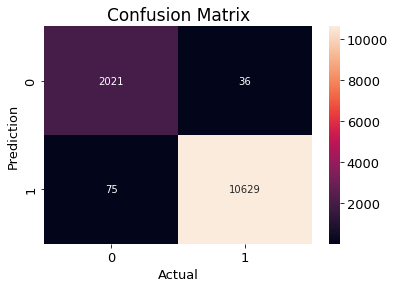

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

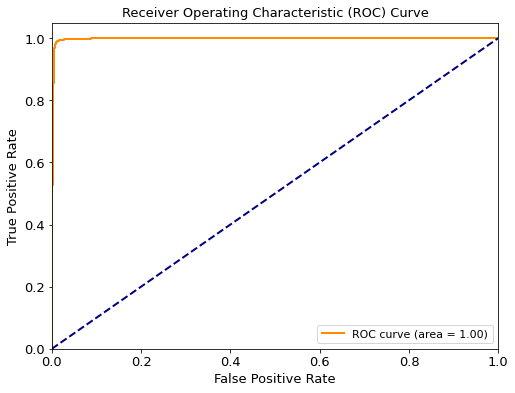

In [72]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### The model was able to learn the dataset to well! However there is a catch
#### When we see to what features more importance is being given by the model, we find the following 

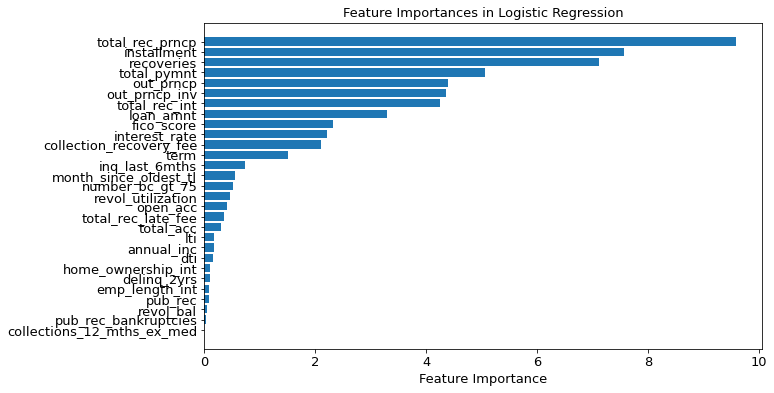

In [73]:
feature_names = X.columns
feature_importances = np.abs(model.coef_[0])
sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importances in Logistic Regression')
plt.show()

#### All the most important features are of those types which  informs us about the loan status in between the loan period, not before the start of the loan period.
#### If we want to make a model which which helps us decide whether we want to issue a loan to a borrower or not, we should only use those featuers which are present to use before the loan period starts

In [74]:
# We decide to drop the following columns

columns_to_drop = [
    'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
    'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
    'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
    'collection_recovery_fee', 'collections_12_mths_ex_med', 'pub_rec_bankruptcies'
]

df_final = df

df_final = df_final.drop(columns=columns_to_drop, axis=1)

In [75]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_amnt              42535 non-null  int64  
 1   term                   42535 non-null  int32  
 2   installment            42535 non-null  float64
 3   annual_inc             42535 non-null  float64
 4   dti                    42535 non-null  float64
 5   interest_rate          42535 non-null  float64
 6   revol_utilization      42535 non-null  float64
 7   number_bc_gt_75        42535 non-null  int64  
 8   fico_score             42535 non-null  int64  
 9   lti                    42535 non-null  float64
 10  month_since_oldest_tl  42535 non-null  float64
 11  loan_status_binary     42535 non-null  int64  
 12  emp_length_int         42535 non-null  int64  
 13  home_ownership_int     42535 non-null  int64  
dtypes: float64(7), int32(1), int64(6)
memory usage: 4.4 MB

In [76]:
X2 = df_final
X2 = X2.drop('loan_status_binary', axis=1)
Y2 = df_final['loan_status_binary']

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2,Y2,test_size=0.3)  #0.3 denotes ratio size

In [77]:
print("Before undersampling: ", Counter(Y_train2))

# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train2_under, Y_train2_under = undersample.fit_resample(X_train2, Y_train2)

# summarize class distribution
print("After undersampling: ", Counter(Y_train2_under))

Before undersampling:  Counter({1: 24933, 0: 4841})
After undersampling:  Counter({0: 4841, 1: 4841})


In [78]:
X_train2_under = sc.fit_transform(X_train2_under)
X_test2 = sc.transform(X_test2)

In [79]:
model2 = LogisticRegression()
model2.fit(X_train2_under,Y_train2_under)
Y_pred2 = model2.predict(X_test2)

In [80]:
accuracy = accuracy_score(Y_test2,Y_pred2)
print("model2 accuracy:", accuracy)

model2 accuracy: 0.8388840999921636


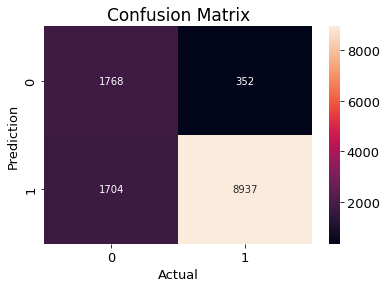

In [81]:
cm = confusion_matrix(Y_test2,Y_pred2)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
## Questions

## Question-1/2

 As a decision maker, I would try to identify what all factors have been decisive in approval/rejection of the already 
 booked accounts. Based on these factors, I may be able to come up with a formula to set a screening criterion(s). 
 Based on the above data analysis, we found out that factors such as :-
 1) Installment
 
 2) Loan_Amount
 
 3) Fico Score
 
 4) Interest Rates
 
 5) Term
 
 6) Home Ownership
 
 These Factors play a crucial role in deciding whether to approve or decline a role. So for any new application,I would take a look into these factors.

## Question-3

We can follow two approaches to identify and remove unintentional bias.
1) The first approach consists of the data analysis step in which we identify the sensitive informations such as gender and race_name in our dataset. We should always analyze how the outcome variable is dependent on these sensitive fields and if we find some disparity between different genders and races, it means our model can be prone to bias. In those situations it is mostly better to drop of those fields as we don't want out model to dicriminate through societal factors. 

2) The other approach could be a case of imbalanced dataset. It may happen that in our training data a majority of the samples correspond to the small output class. This can cause the model to overfit while training and it may be trained in such a way to output only the majority class as it's predicition every time, as this ensures a higher accuracy of our model. To identify this problem, it is necessary to use different accuracy metrics such as F1-score, recall, precision etc. To make the dataset balanced, two techniques are majorly used :- a) UnderSampling (Reduces the majority class) and b) OverSamping (Increased the minority class)